# Load Libraries

In [1]:
#Load Libraries
import pandas as pd
from pandas.plotting import scatter_matrix

import numpy as np

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import scikitplot as skplt

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#install seaborn using pip install seaborn
import seaborn as sb

#parameters tuning
from sklearn.model_selection import GridSearchCV

# Load Dataset

In [2]:
data_table = pd.read_csv(r"C:\Users\wayne\Desktop\Machine Learning for Developers\Wayne\Projects\Assignment\diabetes_data.csv")

# Data Exploration

In [3]:
data_table.shape

(520, 17)

In [4]:
data_table.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [5]:
#Check for distribution
data_table.groupby('class').size()

class
Negative    200
Positive    320
dtype: int64

In [6]:
#Check for blanks
np.where(pd.isnull(data_table))

(array([], dtype=int64), array([], dtype=int64))

# Convert Data from string to numeric for all algorithms to run

In [7]:
cleanData = data_table.replace({"Male":1,"Female":0,"Yes":1,"No":0})

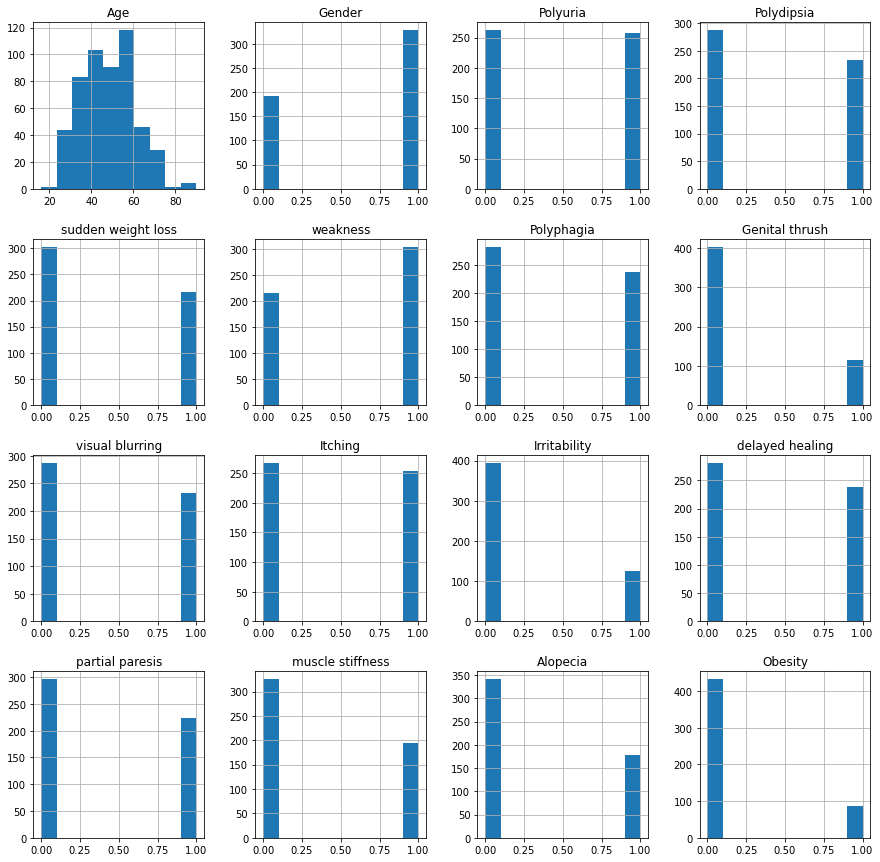

In [8]:
#histograms
cleanData.hist(figsize=(15,15))
plt.show()

# Test for blanks

In [9]:
np.where(data_table.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

# Test for correlation to avoid multicollinearity

<AxesSubplot:>

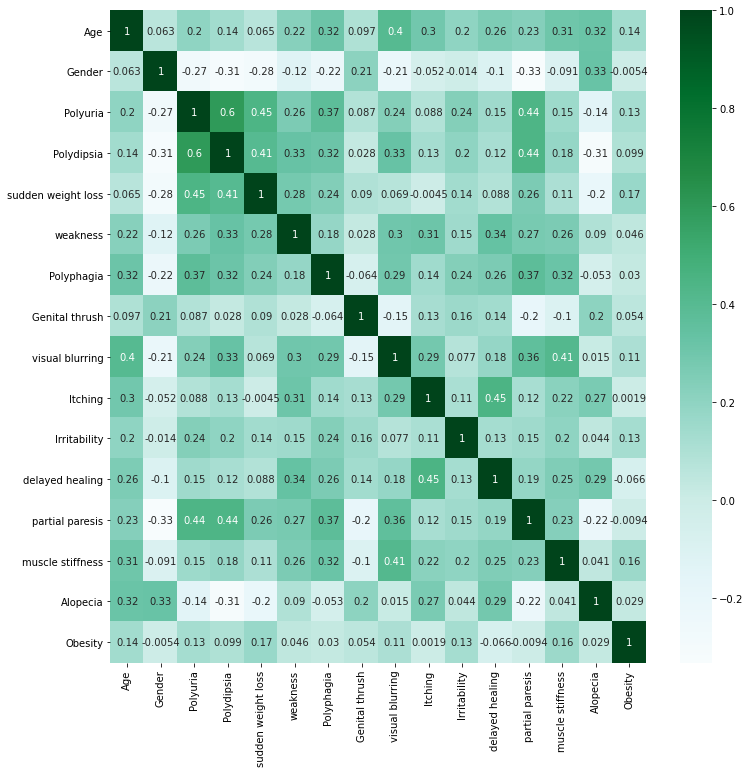

In [10]:
plt.figure(figsize=(12,12))
sb.heatmap(cleanData.corr(), annot=True, cmap='BuGn')

# Splitting of Test and Train set

In [11]:
#split-out validation dataset
array = cleanData.values
X = array [:,0:16]
Y = array [:,16]
validation_size = 0.20
seed = 8
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X,Y,test_size=validation_size,random_state=seed,shuffle = True)


In [12]:
# Test options and evaluation metric
seed = 98
scoring = 'accuracy'

# Test for basic Algorithms

In [13]:
# Spot Check Classifier Algorithms
models = []
models.append(('LR',LogisticRegression(solver='lbfgs',multi_class='auto',max_iter=200)))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('SVM',SVC(gamma='auto')))
models.append(('NB',GaussianNB()))

#evaluate each model in turn
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.925436 (0.039795)
LDA: 0.903717 (0.055580)
KNN: 0.846167 (0.052050)
CART: 0.963995 (0.021923)
SVM: 0.918351 (0.037697)
NB: 0.889547 (0.035595)


# Prediction for Validation Dataset using model which was most accurate for training set

In [14]:
#Make predictions on validation dataset
DTree = DecisionTreeClassifier()
DTree.fit(X_train,Y_train)
predictions=DTree.predict(X_validation)
print("Accuracy:",accuracy_score(Y_validation,predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_validation,predictions))
print("Classification report:")
print(classification_report(Y_validation, predictions))

Accuracy: 0.9615384615384616

Confusion matrix:
[[39  1]
 [ 3 61]]
Classification report:
              precision    recall  f1-score   support

    Negative       0.93      0.97      0.95        40
    Positive       0.98      0.95      0.97        64

    accuracy                           0.96       104
   macro avg       0.96      0.96      0.96       104
weighted avg       0.96      0.96      0.96       104



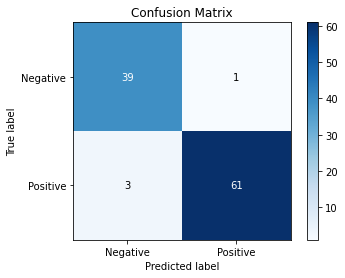

In [15]:
skplt.metrics.plot_confusion_matrix(Y_validation, predictions, normalize=False)
plt.show()

# Attempt to further improve accuracy ensemble learning methods based on decision trees are used

In [16]:
# Spot Check Ensemble Algorithms
models = []
models.append(('GBC',GradientBoostingClassifier()))
models.append(('RFC',RandomForestClassifier()))
models.append(('ABC',AdaBoostClassifier()))


#evaluate each model in turn
results = []
names = []
for name,model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed, shuffle = True)
    cv_results = model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name,cv_results.mean(), cv_results.std())
    print(msg)

GBC: 0.971022 (0.021200)
RFC: 0.980720 (0.020946)
ABC: 0.915970 (0.032657)


# Hyperparameter tuning using grid search to try to improve accuracy further

In [21]:
rf = RandomForestClassifier()

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110, None],
    'max_features': [3,4,5],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [2, 8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid_Result = grid_search.fit(X_train, Y_train)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   30.0s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:  4.2min finished


In [22]:
# summarize results
print("Best: %f using %s" % (grid_Result.best_score_, grid_Result.best_params_))

Best: 0.966340 using {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


# Prediction for Validation Dataset using ensemble learning model which was most accurate for training set using default settings as grid search results had a lower accuracy

In [19]:
#Make predictions on validation dataset with default settings
RFC = RandomForestClassifier()
RFC.fit(X_train,Y_train)
predictions=RFC.predict(X_validation)
print("Accuracy:",accuracy_score(Y_validation,predictions))
print()
print("Confusion matrix:")
print(confusion_matrix(Y_validation,predictions))
print("Classification report:")
print(classification_report(Y_validation, predictions))

Accuracy: 0.9903846153846154

Confusion matrix:
[[40  0]
 [ 1 63]]
Classification report:
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99        40
    Positive       1.00      0.98      0.99        64

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



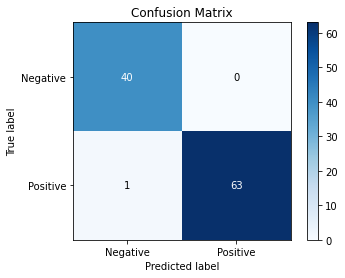

In [20]:
skplt.metrics.plot_confusion_matrix(Y_validation, predictions, normalize=False)
plt.show()